<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AgeStructuredSIRVD-Experiments" data-toc-modified-id="AgeStructuredSIRVD-Experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AgeStructuredSIRVD Experiments</a></span><ul class="toc-item"><li><span><a href="#Models" data-toc-modified-id="Models-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#SIRD" data-toc-modified-id="SIRD-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>SIRD</a></span></li><li><span><a href="#AgeStructuredSIRD" data-toc-modified-id="AgeStructuredSIRD-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>AgeStructuredSIRD</a></span></li><li><span><a href="#AgeStructuredSIRVD" data-toc-modified-id="AgeStructuredSIRVD-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>AgeStructuredSIRVD</a></span><ul class="toc-item"><li><span><a href="#UK-Population-Model" data-toc-modified-id="UK-Population-Model-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>UK Population Model</a></span></li><li><span><a href="#Super-Spreader-Model" data-toc-modified-id="Super-Spreader-Model-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Super Spreader Model</a></span></li></ul></li></ul></li></ul></li></ul></div>

# AgeStructuredSIRVD Experiments

This notebook investigates the impact on mortality of different vaccination strategies across different population compositions.

In [1]:
%load_ext autoreload
%autoreload 2

from Eir import SIRD, AgeStructuredSIRD, AgeStructuredSIRVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 100, 0.1

## Models

### SIRD 

In [4]:
S0 = 55_000_000 # assume a UK population of 65M
I0 = 400_000  # assume 1/160 of overall population currently infected
R0 = 9_600_000  # assume 15% of population have had COVID-19
beta = 0.5
gamma = 0.05
omega = 0.005

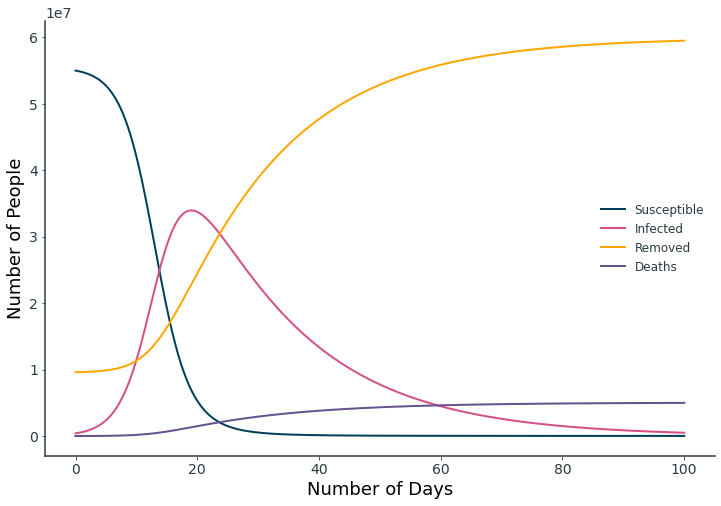

In [5]:
sim = SIRD(S0=S0, I0=I0, R0=R0, beta=beta, gamma=gamma, omega=omega)
df, fig = sim.run(days, dt)
fig;

Qualitative affect of varying parameters:
- Decreasing `gamma` increases the height of the infection peak and shifts it to the left, and increases deaths
- Decreasing `beta` flattens the infection curve and shifts it to the right
- Decreasing `omega` increases the height of the infection peak and increases deaths

### AgeStructuredSIRD

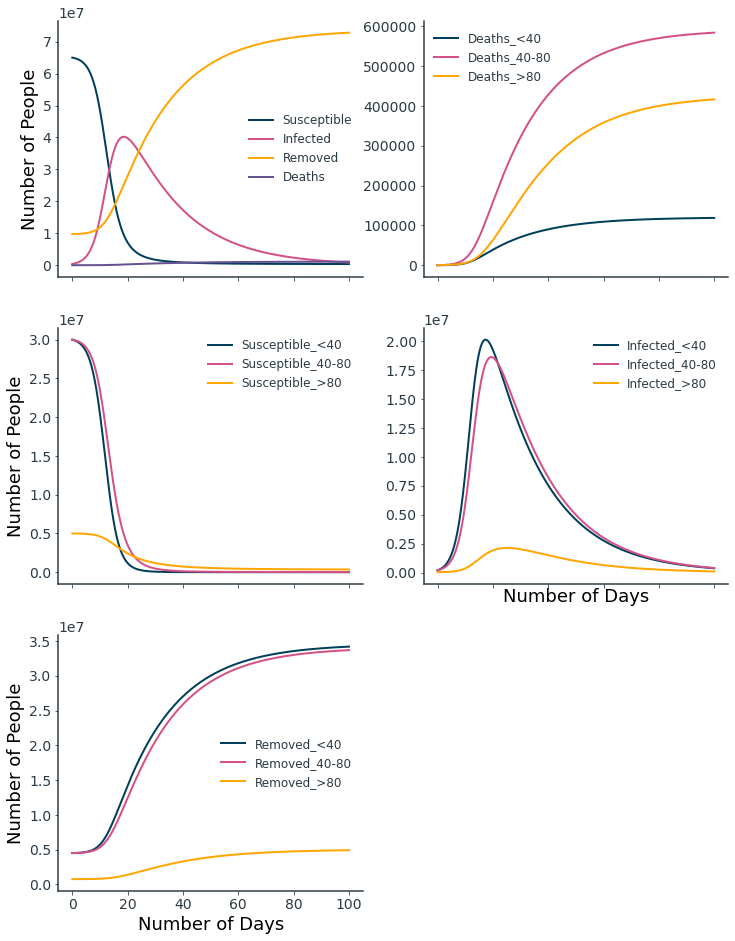

In [6]:
labels = ["<40", "40-80", ">80"]
S0 = [30_000_000, 30_000_000, 5_000_000]
I0 = [187_500, 187_500, 31_250]
R0 = [4_500_000, 4_500_000, 750_000]
beta = np.array(
    (
        [
            [0.9, 0.4, 0.1],
            [0.4, 0.5, 0.2],
            [0.1, 0.2, 0.25],
        ]
    )
)
gamma = [0.05, 0.05, 0.05]
omega = [0.0002, 0.001, 0.005]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

In [7]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Deaths_Count,Fatality_Rate%
Combined,75156250,374385,74781865,72802351,1118905,0.017436
<40,34687500,817,34686683,34198537,118794,0.003984
40-80,34687500,18895,34668605,33690880,583817,0.019608
>80,5781250,354672,5426578,4912934,416293,0.090909


### AgeStructuredSIRVD

#### UK Population Model 

          Start_Count  Vaccinated_Count  Deaths_Count  Fatality_Rate%
Combined     75156250           6936248       1021818        1.747594
<40          34687500           4560182        102100        0.398403
40-80        34687500           1212111        568144        1.960781
>80           5781250           1163954        351572        9.090902
          Start_Count  Vaccinated_Count  Deaths_Count  Fatality_Rate%
Combined     75156250           5602886        773290        1.293054
<40          34687500            121940        119783        0.398406
40-80        34687500           1437236        563730        1.960782
>80           5781250           4043710         89776        9.090881


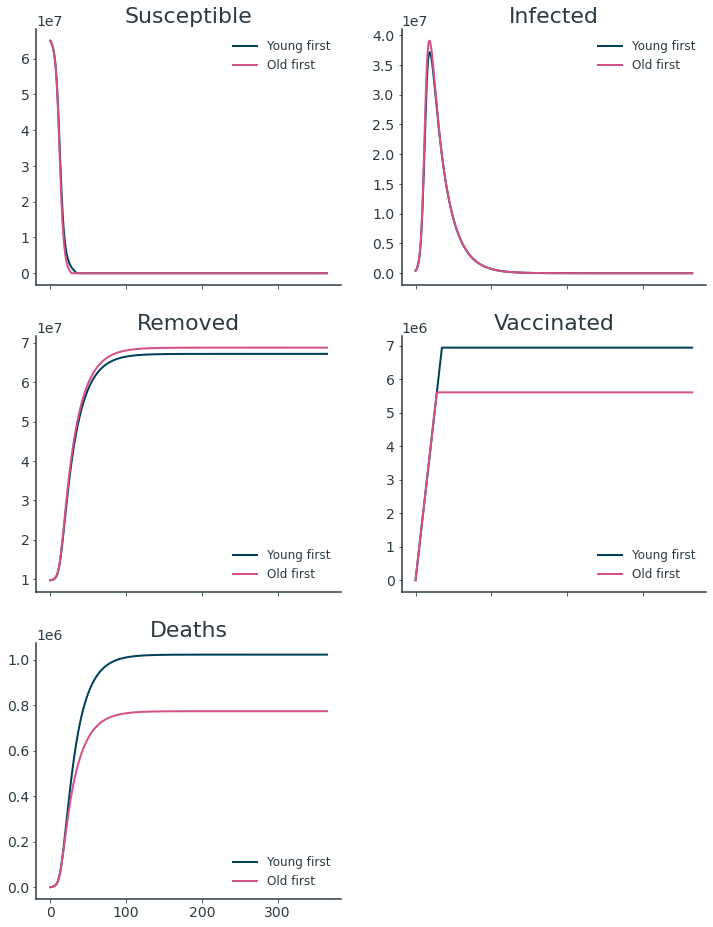

In [8]:
days = 365

labels = ["<40", "40-80", ">80"]
S0 = [30_000_000, 30_000_000, 5_000_000]
I0 = [187_500, 187_500, 31_250]
R0 = [4_500_000, 4_500_000, 750_000]
V0 = [0, 0, 0]
beta = np.array(
    (
        [
            [0.9, 0.4, 0.1],
            [0.4, 0.5, 0.2],
            [0.1, 0.2, 0.25],
        ]
    )
)
gamma = [0.05, 0.05, 0.05]
omega = [0.0002, 0.001, 0.005]
Vd = 200_000  # number of people vaccinated per day
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, _ = sim.run(days, dt)
print(
    sim.end_state()[
        ["Start_Count", "Vaccinated_Count", "Deaths_Count", "Fatality_Rate%"]
    ]
)
df_rev, _ = sim.run(days, dt, reverse_vaccination=True)
print(
    sim.end_state()[
        ["Start_Count", "Vaccinated_Count", "Deaths_Count", "Fatality_Rate%"]
    ]
)

_, ax = plt.subplots(3, 2, figsize=(12, 16), sharex=True, sharey=False)
ax = ax.flatten()
for i, c in enumerate(df.columns[1:6]):
    ax[i].plot(df["Days"], df[c], label="Young first")
    ax[i].plot(df_rev["Days"], df_rev[c], label="Old first")
    ax[i].set_title(c)
    ax[i].legend()
ax[-1].remove()

#### Super Spreader Model

Young first:
          Infected_Count  Vaccinated_Count  Deaths_Count  Fatality_Rate%
Combined        21513463          36499779        192873        0.924458
SS                   110             10000             0        0.000000
<40              7093221          22209779         13559        0.199596
40-80           13309461          14280000        128806        0.990095
>80              1110672                 0         50508        4.761900

Old first:
          Infected_Count  Vaccinated_Count  Deaths_Count  Fatality_Rate%
Combined        41620768          23045842        249141        0.608096
SS                 10110                 0             9        0.089928
<40             21674479           7628521         42663        0.199598
40-80           19553575          10749425        190629        0.990097
>80               382605           4667895         15838        4.761819


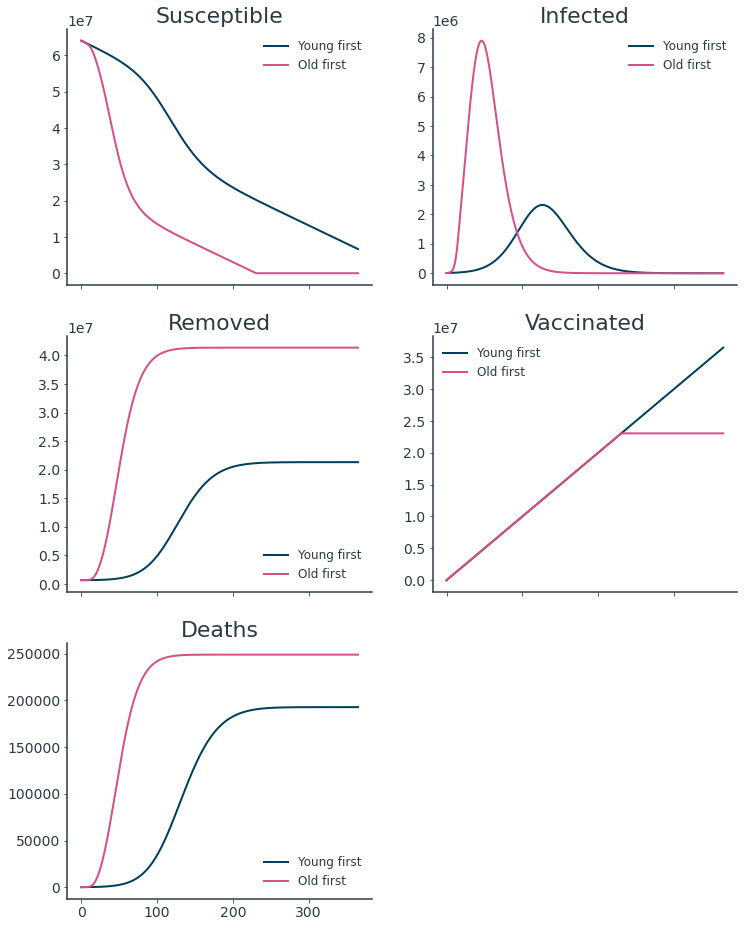

In [9]:
days = 365

labels = ["SS", "<40", "40-80", ">80"]
S0 = [10_000, 29_000_000, 30_000_000, 5_000_000]
I0 = [10, 3_000, 3_000, 500]
R0 = [v * 1 for v in [100, 300_000, 300_000, 50_000]]
V0 = [0, 0, 0, 0]
beta = np.array(
    (
        [
            [50, 40, 30, 20],
            [40, 0.25, 0.15, 0.06],
            [30, 0.15, 0.2, 0.08],
            [20, 0.06, 0.08, 0.1],
        ]
    )
)
gamma = [0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0002, 0.001, 0.005]
Vd = 100_000  # number of people vaccinated per day
V_delay = 0
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt, delay_vaccination=V_delay)
df_end = sim.end_state()
print("Young first:")
print(df_end[["Infected_Count", "Vaccinated_Count", "Deaths_Count", "Fatality_Rate%"]])
df_rev, fig_rev = sim.run(days, dt, reverse_vaccination=True, delay_vaccination=V_delay)
df_rev_end = sim.end_state()
print("\nOld first:")
print(
    df_rev_end[["Infected_Count", "Vaccinated_Count", "Deaths_Count", "Fatality_Rate%"]]
)

_, ax = plt.subplots(3, 2, figsize=(12, 16), sharex=True, sharey=False)
ax = ax.flatten()
for i, c in enumerate(df.columns[1:6]):
    ax[i].plot(df["Days"], df[c], label="Young first")
    ax[i].plot(df_rev["Days"], df_rev[c], label="Old first")
    ax[i].set_title(c)
    ax[i].legend()
ax[-1].remove()